In [2]:
import numpy as np
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fields = ['baade','ogle29','stanek','sweeps']
field_names = ["Baade's Window", 'OGLE29 field', 'Stanek Window', 'SWEEPS Field']
coords = [[1.06,-3.81],[-6.75,-4.72],[0.25,-2.15],[1.26,-2.65]]
odats = []
sdats = []
for i,field in enumerate(fields):
    l,b = coords[i]
    print(field)
    aptab = Table.read("hst_bulge_treasury_obs/hlsp_wfc3bulge_hst_wfc3_"+field+"_multi_v2.0_cat.fits")['CMAG','VMAG','IMAG','JMAG','HMAG']
    #arttab = Table.read("hst_bulge_treasury_obs/hlsp_wfc3bulge_hst_wfc3_"+field+"_multi_v2.0_art.fits")
    dic = {}
    for col in aptab.keys():
        dic[col] = list(aptab[col])[0]
    odats.append(pd.DataFrame(dic))
    sdats.append(pd.read_csv('hst_bulge_treasury_sim/Huston2023_surot3d_l'+f'{l:.3f}'+'_b'+f'{b:.3f}'+'.csv'))

baade


ogle29


stanek


sweeps


In [5]:
print('obs table', odats[0].keys())
print('sim table', sdats[0].keys())

obs table Index(['CMAG', 'VMAG', 'IMAG', 'JMAG', 'HMAG'], dtype='object')
sim table Index(['pop', 'iMass', 'age', 'Fe/H_initial', 'Mass', 'In_Final_Phase', 'Dist',
       'l', 'b', 'vr_bc', 'mul', 'mub', 'x', 'y', 'z', 'U', 'V', 'W', 'VR_LSR',
       'A_Ks', 'logL', 'Teff', 'logg', 'Fe/H_evolved', 'log_radius',
       'WFC3_UVIS_F390W', 'WFC3_UVIS_F555W', 'WFC3_UVIS_F814W',
       'WFC3_IR_F110W', 'WFC3_IR_F160W'],
      dtype='object')


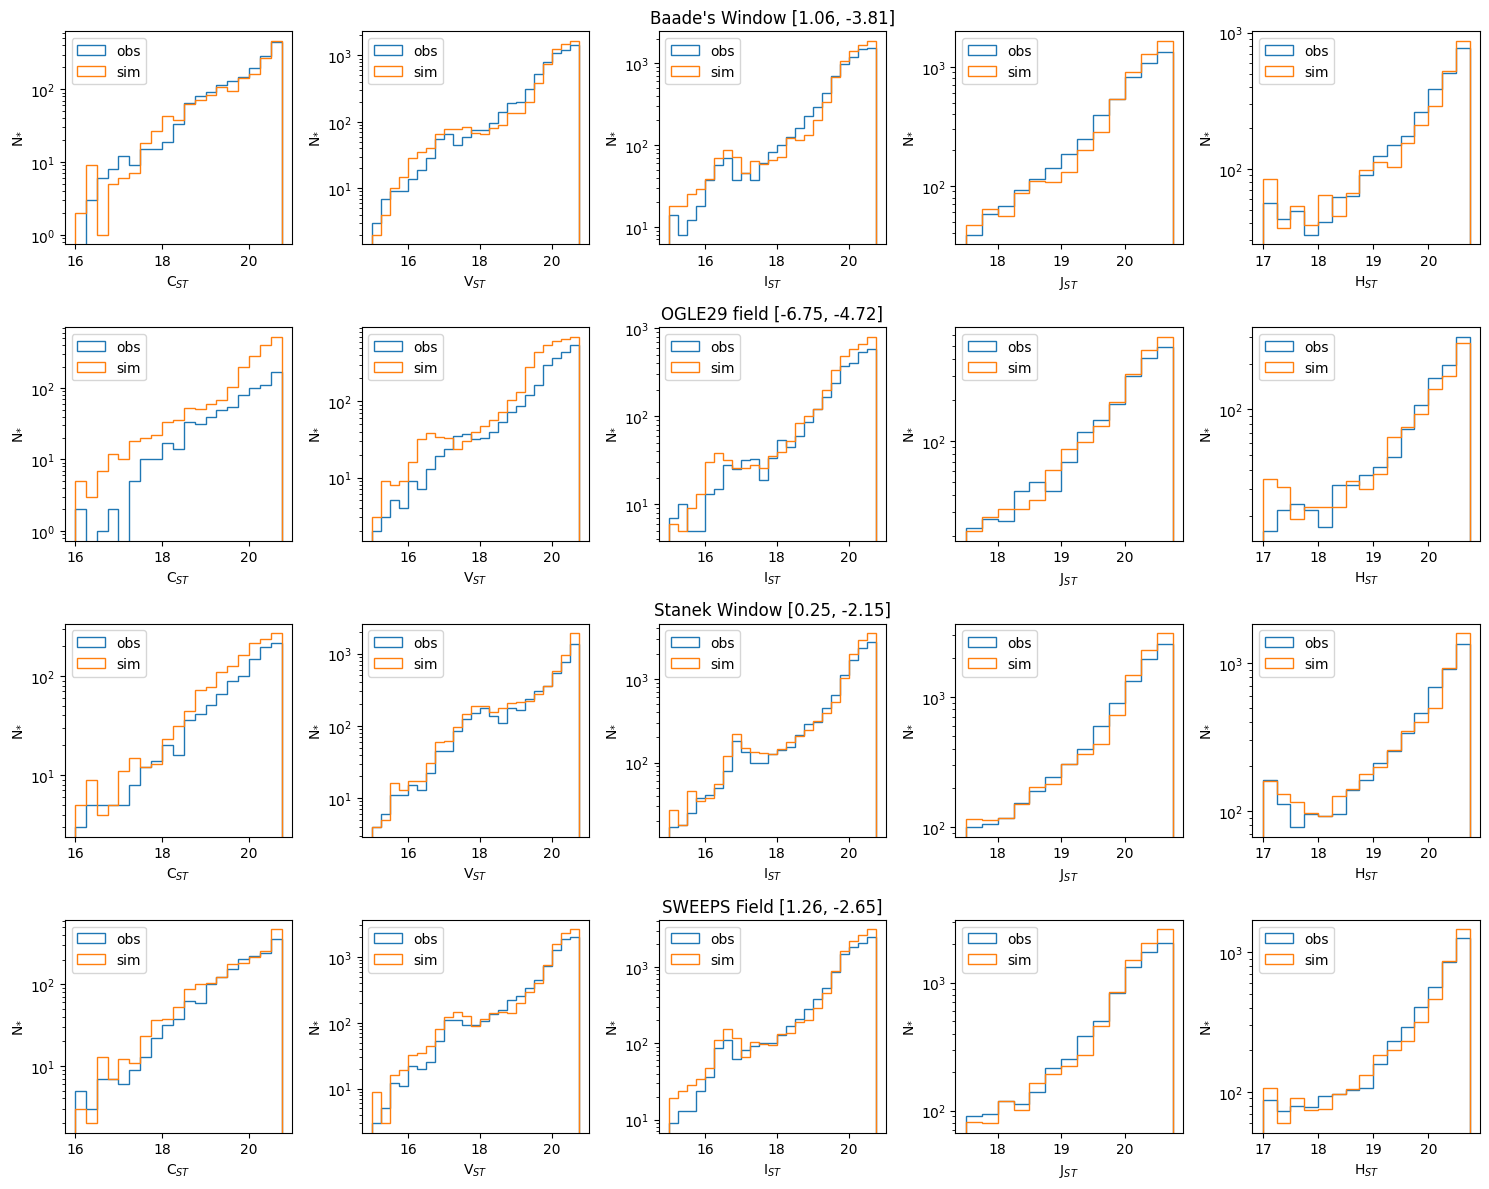

In [6]:
filt_list = {'C':'WFC3_UVIS_F390W','V':'WFC3_UVIS_F555W','I':'WFC3_UVIS_F814W','J':'WFC3_IR_F110W','H':'WFC3_IR_F160W'}
filt_lims = {'C':[16,21],'V':[15,21],'I':[15,21],'J':[17.5,21],'H':[17,21]}
plt.subplots(nrows=4,ncols=5,figsize=(15,12))
for i,field in enumerate(fields):
    j=0
    for filt in filt_list.keys():
        plt.subplot(4,5,1+j+5*i)
        if j==2:
            plt.title(field_names[i]+' '+str(coords[i]))
        bins = np.arange(*filt_lims[filt],0.25)
        plt.hist(odats[i][filt+'MAG'],bins=bins,histtype='step',label='obs')
        #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
        plt.hist(sdats[i][filt_list[filt]],bins=bins,histtype='step',label='sim')
        plt.legend()
        plt.yscale('log')
        j+=1
        plt.ylabel(r'N$_{*}$')
        plt.xlabel(filt+r'$_{ST}$')
plt.tight_layout()
plt.savefig('hst_bulgetreasury_lumfuncs.pdf')

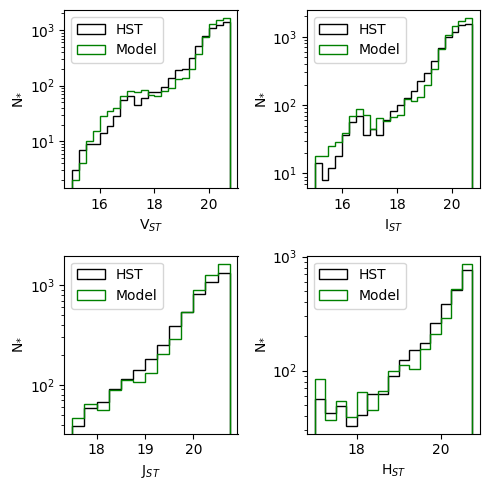

In [27]:
filt_list = {'V':'WFC3_UVIS_F555W','I':'WFC3_UVIS_F814W','J':'WFC3_IR_F110W','H':'WFC3_IR_F160W'}
filt_lims = {'V':[15,21],'I':[15,21],'J':[17.5,21],'H':[17,21]}
plt.subplots(nrows=2,ncols=2,figsize=(5,5))
#plt.suptitle(field_names[-2]+' Luminosity Functions [l,b]='+str(coords[-2])+r'$\degree$')
for i,field in enumerate([fields[-2]]):
    j=0
    for filt in filt_list.keys():
        plt.subplot(2,2,1+j+5*i)
        bins = np.arange(*filt_lims[filt],0.25)
        plt.hist(odats[i][filt+'MAG'],bins=bins,histtype='step',label='HST',color='black')
        #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
        plt.hist(sdats[i][filt_list[filt]],bins=bins,histtype='step',label='Model',color='green')
        plt.legend()
        plt.yscale('log')
        j+=1
        plt.ylabel(r'N$_{*}$')
        plt.xlabel(filt+r'$_{ST}$')
plt.tight_layout()
plt.savefig('hst_bulgetreasury_example.pdf')

/var/folders/_z/fn__fgrs2wqgsmbvw8bvrr0r0000gn/T/ipykernel_28736/1873811645.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


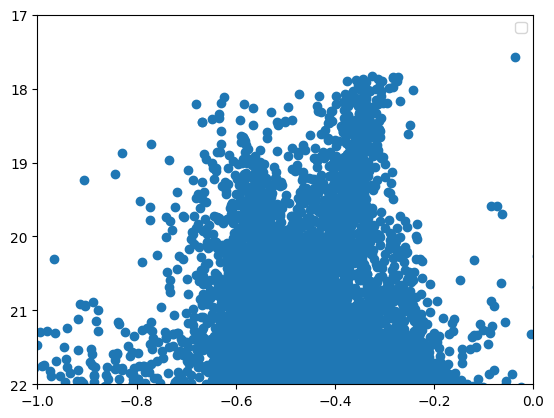

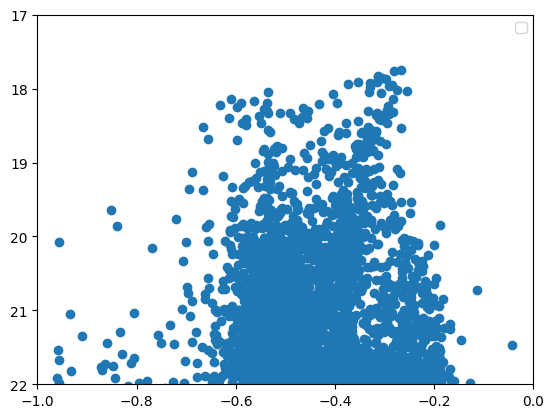

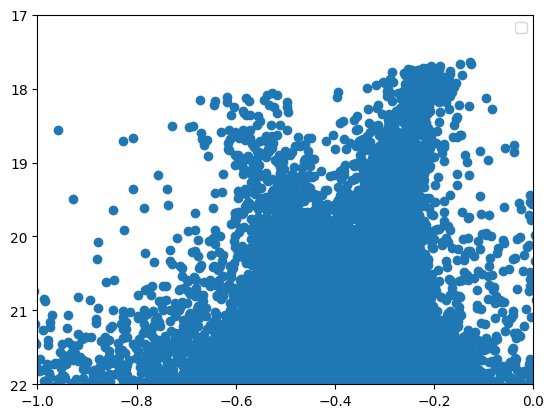

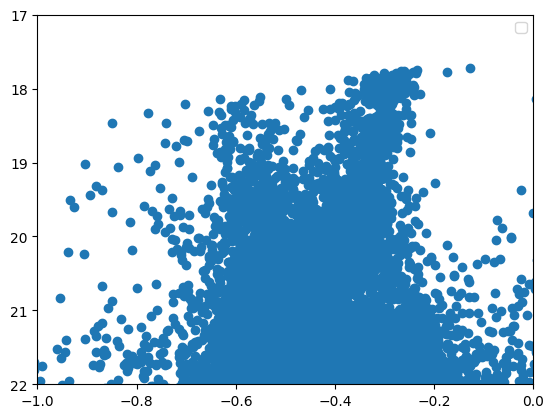

In [56]:
bins = np.arange(15,35,0.5)
for i,field in enumerate(fields):
    plt.figure()
    plt.scatter(odats[i]['JMAG']-odats[i]['HMAG'],odats[i]['HMAG'])
    plt.xlim(-1,0)
    plt.ylim(22,17)
    #plt.plot(bins[1:]-, dhist[0]*ahist[0]/qhist[0])
    #plt.hist(sdats[i]['WFC3_UVIS_F814W'],bins=bins,histtype='step',label='sim')
    plt.legend()

In [6]:
aptab = Table.read("hst_bulge_treasury_obs/hlsp_wfc3bulge_hst_wfc3_stanek_multi_v2.0_art.fits")
dic = {}
for col in aptab.keys():
    dic[col] = list(aptab[col])[0]
adats = dic

In [7]:
adats

{'XIN': array([6426.11360174, 5199.54795   , 4253.84658425, ..., 2670.79481435,
        3615.38771092, 3783.08262703], dtype='>f8'),
 'XOUT': array([6426.11054326, 5199.54795   , 4253.82088531, ..., 2670.83315758,
        3617.58821496, 3778.37352595], dtype='>f8'),
 'YIN': array([3913.59322926, 2302.11002005, 3823.01024491, ..., 6184.0500523 ,
        3966.12815476, 6727.86369337], dtype='>f8'),
 'YOUT': array([3913.6350408 , 2302.11002005, 3823.01677202, ..., 6183.98560078,
        3964.72121189, 6725.69487934], dtype='>f8'),
 'CIN': array([20.557, 22.071, 18.243, ..., 31.07 , 29.976, 32.727], dtype='>f8'),
 'COUT': array([20.551     , 22.07      , 18.25      , ..., 29.217     ,
        22.925     , 99.98999786], dtype='>f8'),
 'COUTERR': array([4.00e-03, 8.00e-03, 1.00e-03, ..., 3.50e-01, 2.60e-02, 9.99e+00],
       dtype='>f8'),
 'CO': array([0.   , 0.001, 0.   , ..., 0.   , 0.   , 1.   ], dtype='>f8'),
 'CQ': array([1.   , 0.948, 1.   , ..., 0.213, 0.816, 0.   ], dtype='>f8'),
 'V

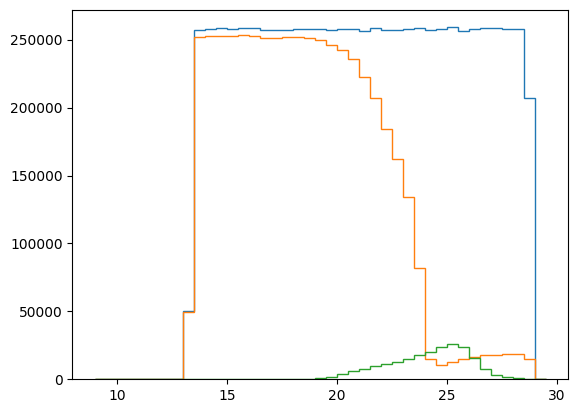

In [93]:
bins = np.arange(9,30,0.5)
ahist = plt.hist(adats['IIN'],bins=bins,histtype='step',label='obs')
qhist = plt.hist(adats['IIN'][(adats['IO']<0.01)*(adats['IQ']>0.99)],bins=bins,histtype='step',label='obs')
obhist = plt.hist(odats[2]['IMAG'],bins=bins,histtype='step',label='obs2')

/var/folders/_z/fn__fgrs2wqgsmbvw8bvrr0r0000gn/T/ipykernel_28736/4262026507.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(obhist[0]/(qhist[0]/ahist[0]))


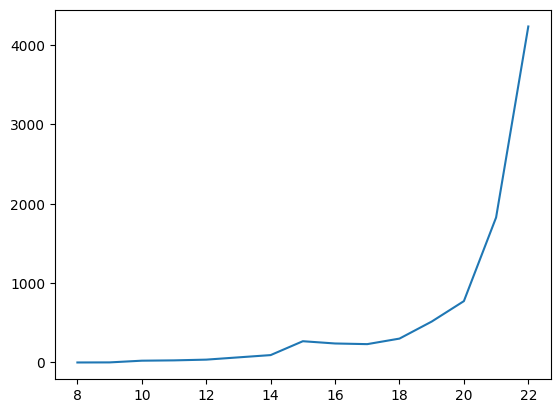

In [24]:
plt.plot(obhist[0]/(qhist[0]/ahist[0]))